# Clase 6/10/2020 - Video 9
## Material de clase:
- 3D Slicer: slicer4minute.mrb

# Parte 1: Adquisicion / Manipulacion / Generacion de datos
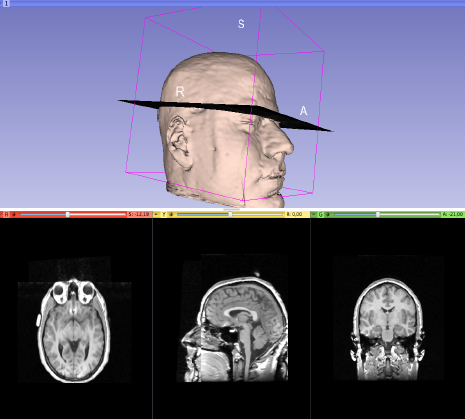

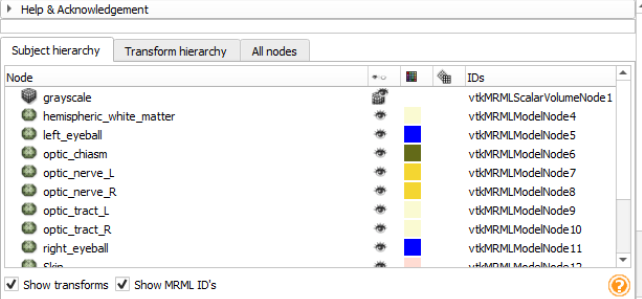

### Obtener la escena

La escena tiene una estructura de arbol y tiene **nodos** que pueden **añadirse, eliminarse y buscarse**

Así se ven los identificadores ID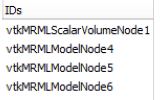

### Recuperemos el volumen de la resonancia
En la **escena** se llama **grayscale**
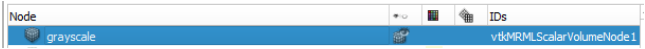

**volumen** contiene los datos que constituyen la imagen, a los cuales se puede acceder con **GetImageData()**

*imagen* es un **tipo de dato vtk.vtkImageData** el cual **consiste** en una **matriz**. 
A partir de este podemos conocer propiedades de la imagen

### Crear un volumen nuevo y vacio:

### Asignar un arreglo de datos a un volumen vacio
Vector_numpy --asignarlo--> **vtk.vtkImageData() --asociarlo--> vtkMRMLScalarVolumeNode()                                       
Se **asocia** mediante el comando: **volumen_vacio.SetAndObserveImageData(imagen)

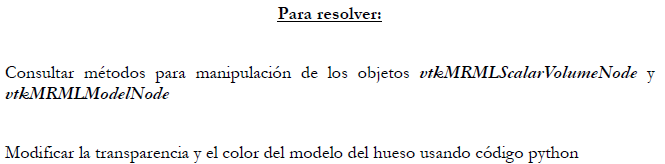

## Resumen 1

# Parte 2: Manipulacion de Imagen / Matriz de datos / Matricez de Transformacion

### Manipulacion de Imagenes (min 15:26)
vtkImageData --> Representacion de volumenes de la biblioteca vtk, pero Slicer no puede trabajar con ellos diretamente!!       
vtkMRMLScalarVolumeNode --> contenedor de objetos vtkImageData en 3D Slicer

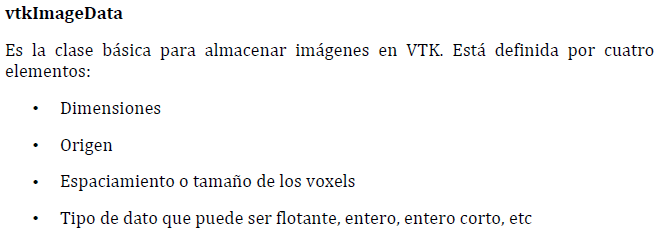

### Creemos una imagen sin datos

### Creemos un volumen vacio y asignemos la imagen creada previamente

### Para extraer propiedades de la imagen creada
- Puede extraerse la matriz con **GetPointData()** pero es bastante dificil de manipular
- Lo mas facil es extraer los escalares **GetPointData().GetScalars()**

### Slicer.util para la manipulacion de la matriz de datos de una imagen, como si fuera un ndarray
matriz_ndarray_ejemplo = slicer.util.array('Prueba')

### Probemos con la matriz que sí tiene datos, tomada del objeto vtk.ImageData() que extraemos del volumen de resonancia "grayscale"

### Matricez de transformacion del objeto vtkMRMLScalarVolumeNode() - (min 27:00)
Permite relacionar entradas del espacio **(i,j,k)**                                                                            
con las coordenadas del espacio **anatomico (RAS)**: Der/Izq, Anterior/Posterior, Superior/Inferior 

# Parte 3: Remuestreo para acomodar la imagen usando vtk (Filtro)

### Recuperamos los datos

### Generemos una matriz de transformacion con algunas operaciones

### Se genera el objeto vtkImageReslice() que remuestrea la imagen

reslice = vtk.vtkImageReslice()               # Se instancia el objeto de la clase Reslice para reuestrear
reslice.SetInputData(imagen)                  # Metodo para asociar datos de la imagen al filtro
reslice.SetResliceTransform(transformacion_1) # Se aplica la transformacion
reslice.InterpolateOn()                       # Calculo mediante interpolacion para evitar que falten puntos
reslice.SetBackgroundLevel(-1024)             # Se agrega un nivel de fondo para visualizar mejor

resultado_del_reslice = reslice.GetOutput()   # Se solicita la salida del filtro

### Generemos un volumen nuevo para ver el resultado del volumen filtrado por vtkImageReslice

volumen_resultante = slicer.vtkMRMLScalarVolumeNode()
volumen_resultante.SetAndObserveImageData(resultado_del_reslice)

reslice.Update()                              # Es necesario actualizar el filtro despues de cada transformacion aplicada

### Para visualizar en el espacio de imagen (RAS) la transformacion realizada debe aplicarse la matriz de transformacion

### Tambien es necesario establecer las coordenadas del volumen resultate, las cuales seran las mismas del volumen original

### En caso de que el volumen original tuviera transformaciones, se intentaran adicionarse al volumen resultante (min 47:30)

### Finalmente se añade el volumen resultante a la escena de 3D Slicer

### Para visualizar el resultado (min 48:30)
Es una vista establecemos background y foreground el volumen original y el resultante para ver los cambios

# Parte 4: Fiducials para estudios cuantitativos (min 49:00)

Al ubicar un fiducial, Slicer le asigna el nombre "vtkMRMLMarkupsFiducialNodeX" por defecto, donde X es un # segun el orden en que se ubicaron.
Tambien se pueden crear en el modulo "annotations"

Si queremos obtener el vector en (i,j,k) recuperamos la matriz *ras2ijk* y la multiplicamos por la matris *ras* obtenida.
Debe buscarse que metodo de vtk puede hacer la multiplicacion

# Parte 5: Graficar Valores en 3D Slicer (min 54:00)

# Parte 6: Identificar parametros de un modulo y ejecutarlo